## PyCaret: Anatomy of Classification

In [13]:
# import libraries
from pathlib import Path
import pandas as pd
import numpy as np
from pycaret.classification import *

### Task 1: Import Data, Initial dataset check and setup Pycaret(install and set up environment)

In [14]:
data_path = Path('bank.csv')
df = pd.read_csv(data_path, sep=';')

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [17]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [19]:
session1 = setup(df, target='y', session_id=1, log_experiment=False, normalize=True,
                 normalize_method='zscore', transformation=True, transformation_method='quantile',
                 experiment_name='bank_1')

Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(4521, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Task 2: Compare model performance

In [20]:
best_model = compare_models(exclude=['catboost'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9033,0.9053,0.4137,0.6224,0.4953,0.4444,0.4566,0.3981
1,Logistic Regression,0.8985,0.8977,0.3342,0.6157,0.4318,0.3815,0.4037,0.0759
2,Ada Boost Classifier,0.8982,0.8983,0.3699,0.5961,0.4550,0.4025,0.4171,0.1416
3,Linear Discriminant Analysis,0.8970,0.8917,0.3205,0.6053,0.4172,0.3666,0.3899,0.0371
4,Extreme Gradient Boosting,0.8948,0.9016,0.4000,0.5661,0.4640,0.4082,0.4180,0.4839
5,Light Gradient Boosting Machine,0.8935,0.8998,0.3863,0.5642,0.4546,0.3982,0.4089,0.1229
6,Ridge Classifier,0.8932,0.0000,0.1562,0.6724,0.2509,0.2167,0.2866,0.0103
7,Random Forest Classifier,0.8894,0.8593,0.2274,0.5516,0.3164,0.2687,0.3018,0.1272
8,Extra Trees Classifier,0.8887,0.8589,0.1863,0.5689,0.2738,0.2309,0.2765,0.2453
9,K Neighbors Classifier,0.8869,0.7573,0.1534,0.5261,0.2347,0.1942,0.2386,0.0279


In [21]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


### Task 3: Create best performing models

In [22]:
# gradient boosting classifier
gbc = create_model('gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8989,0.8969,0.3425,0.6098,0.4386,0.3878,0.4074
1,0.8957,0.9125,0.4247,0.5636,0.4844,0.4277,0.4330
2,0.9052,0.9108,0.4247,0.6327,0.5082,0.4580,0.4691
3,0.9115,0.9101,0.4932,0.6545,0.5625,0.5144,0.5208
4,0.9051,0.8964,0.3836,0.6512,0.4828,0.4343,0.4528
Mean,0.9033,0.9053,0.4137,0.6224,0.4953,0.4444,0.4566
SD,0.0055,0.0071,0.0501,0.0334,0.0404,0.0416,0.0381


In [24]:
# logistic regression
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8957,0.8876,0.3151,0.5897,0.4107,0.3593,0.3806
1,0.8926,0.8981,0.3425,0.5556,0.4237,0.3682,0.3813
2,0.8894,0.8897,0.3288,0.5333,0.4068,0.3496,0.3620
3,0.9147,0.9219,0.3973,0.7436,0.5179,0.4758,0.5040
4,0.9003,0.8911,0.2877,0.6562,0.4000,0.3546,0.3907
Mean,0.8985,0.8977,0.3342,0.6157,0.4318,0.3815,0.4037
SD,0.0088,0.0126,0.0363,0.0763,0.0437,0.0475,0.0510


In [32]:
# ada boost
ada = create_model('ada', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8942,0.8687,0.3288,0.5714,0.4174,0.3638,0.3807
1,0.8894,0.8926,0.3288,0.5333,0.4068,0.3496,0.3620
2,0.8942,0.9109,0.3973,0.5577,0.4640,0.4071,0.4143
3,0.9100,0.9142,0.4521,0.6600,0.5366,0.4886,0.4994
4,0.9035,0.9053,0.3425,0.6579,0.4505,0.4033,0.4292
Mean,0.8982,0.8983,0.3699,0.5961,0.4550,0.4025,0.4171
SD,0.0074,0.0165,0.0482,0.0528,0.0458,0.0485,0.0475


In [25]:
# linear discriminant analysis
lda = create_model('lda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9052,0.8839,0.3562,0.6667,0.4643,0.4175,0.4423
1,0.8910,0.8923,0.3014,0.5500,0.3894,0.3351,0.3534
2,0.8926,0.8798,0.3562,0.5532,0.4333,0.3771,0.3882
3,0.9005,0.9149,0.2740,0.6667,0.3883,0.3443,0.3850
4,0.8956,0.8876,0.3151,0.5897,0.4107,0.3592,0.3805
Mean,0.8970,0.8917,0.3205,0.6053,0.4172,0.3666,0.3899
SD,0.0052,0.0123,0.0320,0.0521,0.0287,0.0291,0.0289


In [26]:
# extreme gradient
xg = create_model('xgboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8894,0.8894,0.3699,0.5294,0.4355,0.3763,0.3838
1,0.8942,0.9237,0.4521,0.5500,0.4962,0.4377,0.4404
2,0.8942,0.9014,0.4658,0.5484,0.5037,0.4449,0.4468
3,0.8989,0.9052,0.4247,0.5849,0.4921,0.4375,0.4444
4,0.8972,0.8881,0.2877,0.6176,0.3925,0.3444,0.3746
Mean,0.8948,0.9016,0.4000,0.5661,0.4640,0.4082,0.4180
SD,0.0032,0.0129,0.0651,0.0314,0.0432,0.0404,0.0319


### Task 4: Hyper Parameter tuning the model

In [27]:
# gradient boosting classifier
tuned_gbc = tune_model(gbc, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8926,0.8903,0.3699,0.5510,0.4426,0.3857,0.3951
1,0.8989,0.9196,0.4521,0.5789,0.5077,0.4523,0.4566
2,0.8957,0.9109,0.4247,0.5636,0.4844,0.4277,0.4330
3,0.8831,0.9072,0.3836,0.4912,0.4308,0.3667,0.3702
4,0.8908,0.8932,0.3151,0.5476,0.4000,0.3447,0.3607
Mean,0.8922,0.9042,0.3890,0.5465,0.4531,0.3954,0.4031
SD,0.0053,0.0110,0.0471,0.0297,0.0384,0.0394,0.0366


In [28]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.11, loss='deviance', max_depth=60,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=175,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8500000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
# logistic regression1
tuned_lr = tune_model(lr, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8926,0.8871,0.3151,0.5610,0.4035,0.3496,0.3672
1,0.8926,0.8963,0.3425,0.5556,0.4237,0.3682,0.3813
2,0.8894,0.8883,0.3288,0.5333,0.4068,0.3496,0.3620
3,0.9163,0.9219,0.3973,0.7632,0.5225,0.4816,0.5126
4,0.9003,0.8912,0.2877,0.6562,0.4000,0.3546,0.3907
Mean,0.8982,0.8970,0.3342,0.6139,0.4313,0.3807,0.4028
SD,0.0097,0.0129,0.0363,0.0858,0.0463,0.0509,0.0558


In [30]:
tuned_lr

LogisticRegression(C=1.937, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Task 5: Stacking, Blending & Ensemble multiple models

In [33]:
stacked_gbc = stack_models(estimator_list=[tuned_gbc, tuned_lr, ada, lda, xg],
                           meta_model=gbc, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9036,0.8934,0.4658,0.6071,0.5271,0.4745,0.4797
1,0.8957,0.9224,0.3973,0.5686,0.4677,0.4120,0.4201
2,0.8878,0.9089,0.4110,0.5172,0.4580,0.3964,0.3996
3,0.9115,0.9172,0.5342,0.6393,0.5821,0.5331,0.5358
4,0.8987,0.9025,0.3699,0.6000,0.4576,0.4052,0.4197
Mean,0.8995,0.9089,0.4356,0.5865,0.4985,0.4442,0.4510
SD,0.0079,0.0103,0.0584,0.0413,0.0491,0.0523,0.0502


In [34]:
ensemble = ensemble_model(tuned_gbc, n_estimators=10, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8894,0.8966,0.2877,0.5385,0.3750,0.3204,0.3394
1,0.8942,0.9138,0.3425,0.5682,0.4274,0.3730,0.3875
2,0.8910,0.9134,0.3699,0.5400,0.4390,0.3810,0.3894
3,0.8926,0.9109,0.4110,0.5455,0.4688,0.4103,0.4154
4,0.9003,0.9014,0.3288,0.6316,0.4324,0.3837,0.4084
Mean,0.8935,0.9072,0.3479,0.5647,0.4285,0.3737,0.3880
SD,0.0038,0.0069,0.0412,0.0351,0.0304,0.0294,0.0266


In [35]:
blender = blend_models(estimator_list=[tuned_gbc, tuned_lr, ada, ensemble], method='soft', fold=5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8942,0.8938,0.3151,0.5750,0.4071,0.3544,0.3738
1,0.8942,0.9176,0.3699,0.5625,0.4463,0.3905,0.4010
2,0.9021,0.9050,0.4247,0.6078,0.5000,0.4476,0.4565
3,0.8989,0.9107,0.4110,0.5882,0.4839,0.4298,0.4383
4,0.8972,0.9032,0.3014,0.6111,0.4037,0.3544,0.3811
Mean,0.8973,0.9061,0.3644,0.5889,0.4482,0.3953,0.4101
SD,0.0030,0.0079,0.0495,0.0187,0.0391,0.0382,0.0322


### Task 6: Visualize performance

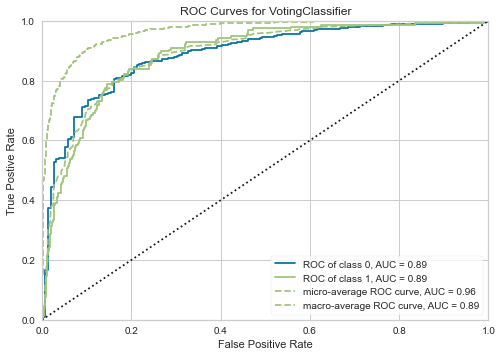

In [36]:
plot_model(blender)

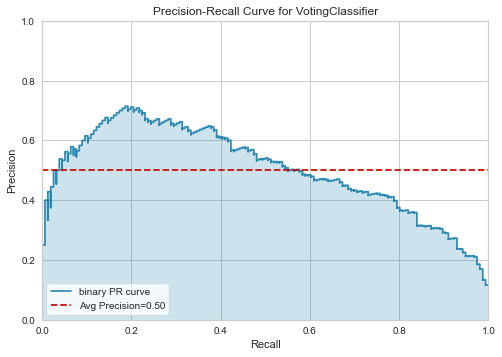

In [37]:
plot_model(blender, plot='pr')

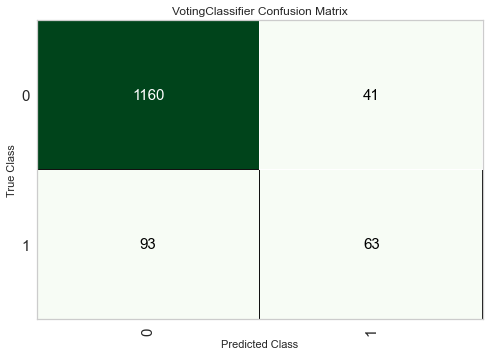

In [39]:
plot_model(blender, plot='confusion_matrix')

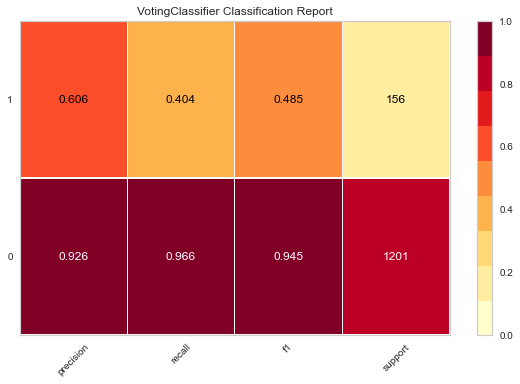

In [41]:
plot_model(blender, plot='class_report')

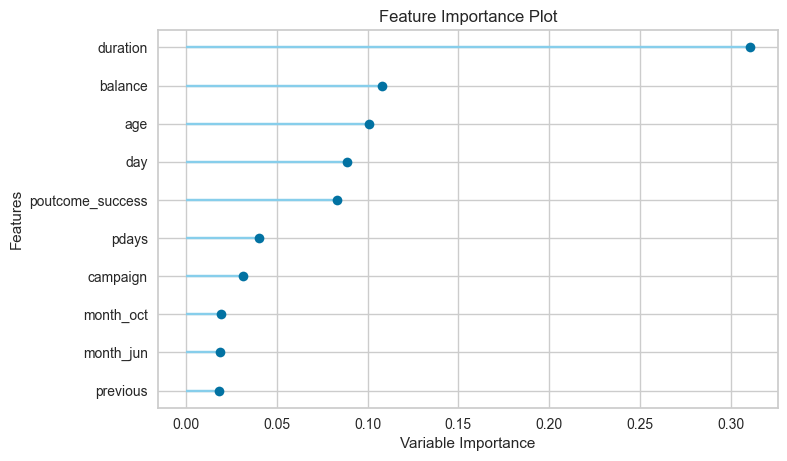

In [44]:
plot_model(tuned_gbc, plot='feature')

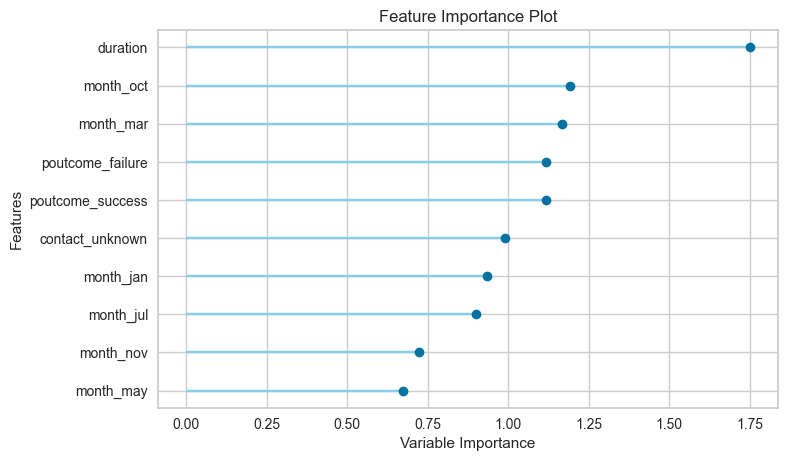

In [45]:
plot_model(tuned_lr, plot='feature')

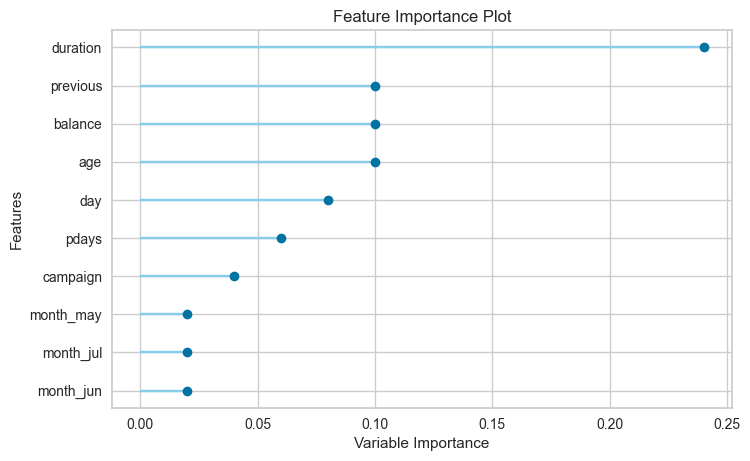

In [46]:
plot_model(ada, plot='feature')

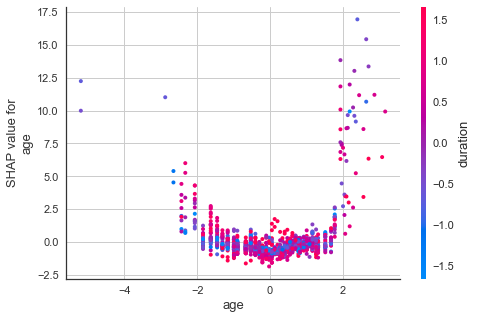

In [47]:
interpret_model(tuned_gbc, plot='correlation', feature='age')

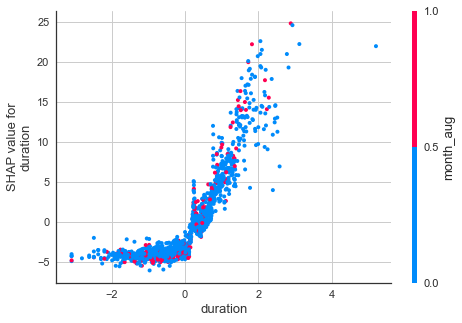

In [48]:
interpret_model(tuned_gbc, plot='correlation', feature='duration')

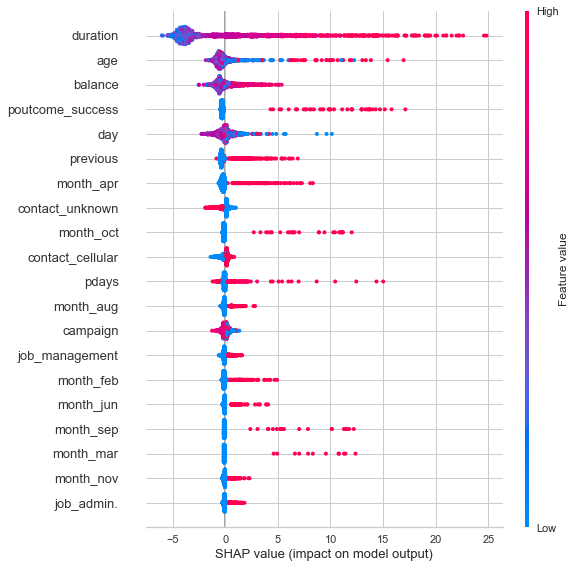

In [50]:
interpret_model(tuned_gbc, plot='summary')

In [49]:
# save model
save_model(blender, 'blender_1')

Transformation Pipeline and Model Succesfully Saved
